In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
from matplotlib.dates import DateFormatter
link_github = "https://github.com/NguyenTrieu903/Sales_Product_Data_Analysis"
Sales_January = pd.read_csv("https://raw.githubusercontent.com/NguyenTrieu903/Sales_Product_Data_Analysis/main/input/Sales_January_2019.csv")
Sales_February = pd.read_csv("https://raw.githubusercontent.com/NguyenTrieu903/Sales_Product_Data_Analysis/main/input/Sales_February_2019.csv")
Sales_March = pd.read_csv("https://raw.githubusercontent.com/NguyenTrieu903/Sales_Product_Data_Analysis/main/input/Sales_March_2019.csv")
Sales_April = pd.read_csv("https://raw.githubusercontent.com/NguyenTrieu903/Sales_Product_Data_Analysis/main/input/Sales_April_2019.csv")
Sales_May = pd.read_csv("https://raw.githubusercontent.com/NguyenTrieu903/Sales_Product_Data_Analysis/main/input/Sales_May_2019.csv")
Sales_June = pd.read_csv("https://raw.githubusercontent.com/NguyenTrieu903/Sales_Product_Data_Analysis/main/input/Sales_June_2019.csv")
Sales_July = pd.read_csv("https://raw.githubusercontent.com/NguyenTrieu903/Sales_Product_Data_Analysis/main/input/Sales_July_2019.csv")
Sales_August = pd.read_csv("https://raw.githubusercontent.com/NguyenTrieu903/Sales_Product_Data_Analysis/main/input/Sales_August_2019.csv")
Sales_September = pd.read_csv("https://raw.githubusercontent.com/NguyenTrieu903/Sales_Product_Data_Analysis/main/input/Sales_September_2019.csv")
Sales_October = pd.read_csv("https://raw.githubusercontent.com/NguyenTrieu903/Sales_Product_Data_Analysis/main/input/Sales_October_2019.csv")
Sales_November = pd.read_csv("https://raw.githubusercontent.com/NguyenTrieu903/Sales_Product_Data_Analysis/main/input/Sales_November_2019.csv")
Sales_December = pd.read_csv("https://raw.githubusercontent.com/NguyenTrieu903/Sales_Product_Data_Analysis/main/input/Sales_December_2019.csv")

list_Sales_Year_2019 = [Sales_January, Sales_February, Sales_March, Sales_April, Sales_May, Sales_June, Sales_July, Sales_August, Sales_September, Sales_October, Sales_November, Sales_December]
print(list_Sales_Year_2019[1])

      Order ID                   Product Quantity Ordered Price Each  \
0       150502                    iPhone                1        700   
1       150503     AA Batteries (4-pack)                1       3.84   
2       150504    27in 4K Gaming Monitor                1     389.99   
3       150505  Lightning Charging Cable                1      14.95   
4       150506     AA Batteries (4-pack)                2       3.84   
...        ...                       ...              ...        ...   
12031   162004  Apple Airpods Headphones                1        150   
12032   162005    AAA Batteries (4-pack)                2       2.99   
12033   162006      USB-C Charging Cable                1      11.95   
12034   162007      USB-C Charging Cable                1      11.95   
12035   162008          27in FHD Monitor                1     149.99   

           Order Date                         Purchase Address  
0      02/18/19 01:35        866 Spruce St, Portland, ME 04101  
1    

In [2]:
total_sales_2019 = pd.DataFrame()
for sales_month in list_Sales_Year_2019:
    total_sales_2019 = pd.concat([total_sales_2019, sales_month])

total_sales_2019.shape

(186849, 6)

In [3]:
total_sales_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186849 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [4]:
total_sales_2019.isnull().sum()

Order ID            544
Product             544
Quantity Ordered    544
Price Each          544
Order Date          544
Purchase Address    544
dtype: int64

In [5]:
total_sales_2019 = total_sales_2019.dropna(how='all')
total_sales_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [6]:
total_sales_2019.shape

(186305, 6)

In [7]:
total_sales_2019['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', 'Quantity Ordered', '6', '9', '8'],
      dtype=object)

In [8]:
filter = total_sales_2019['Quantity Ordered'] == 'Quantity Ordered'
total_sales_2019 = total_sales_2019[~filter]

total_sales_2019['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', '6', '9', '8'], dtype=object)

In [9]:
total_sales_2019.shape

(185950, 6)

In [10]:
total_sales_2019['Quantity Ordered'] = total_sales_2019['Quantity Ordered'].astype(int)
total_sales_2019['Price Each'] = total_sales_2019['Price Each'].astype(float)
total_sales_2019['Order Date'] = pd.to_datetime(total_sales_2019['Order Date'])

In [11]:
def state(x):
    state = x.split(',')[2]
    return state.split(' ')[1]
total_sales_2019['State'] = total_sales_2019['Purchase Address'].apply(state)
total_sales_2019['Sales'] = total_sales_2019['Quantity Ordered'] * total_sales_2019['Price Each'] 
total_sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,State,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",MA,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",OR,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",CA,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",CA,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",TX,11.99


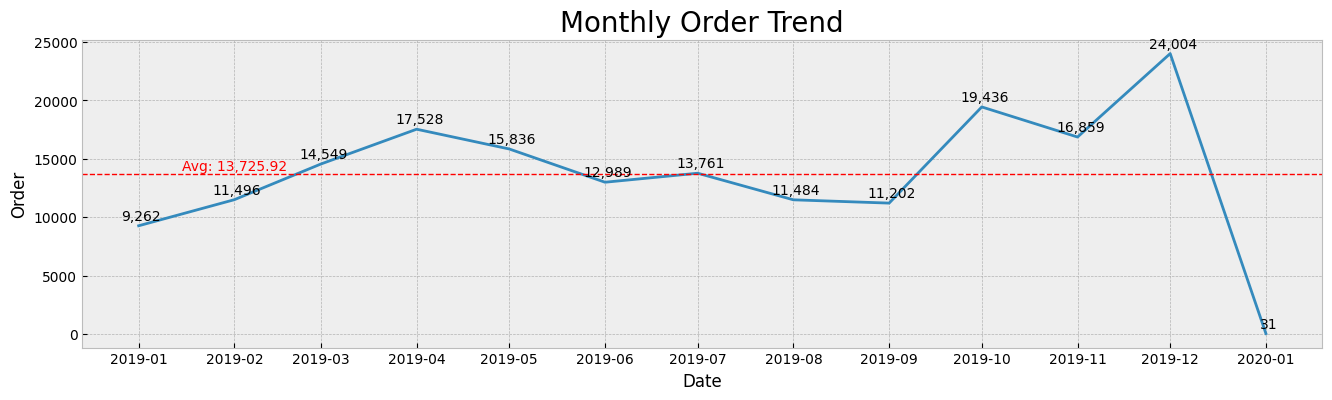

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
monthly_order_df = pd.DataFrame(total_sales_2019.groupby([total_sales_2019['Order Date'].dt.year, 
                                                             total_sales_2019['Order Date'].dt.month])['Order ID'].nunique())
monthly_order_df.index = pd.to_datetime(monthly_order_df.index.map('{0[0]}-{0[1]}'.format))
monthly_order_df.index.name = 'Order Date'
monthly_order_df = monthly_order_df.rename(columns={'Order ID': 'Total Ordered'}).reset_index()

#find average monthly order
average_monthly_order = monthly_order_df['Total Ordered'].mean()

#generate monthly order visual
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 4))
    sns.lineplot(x='Order Date', y='Total Ordered', data=monthly_order_df)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    plt.ticklabel_format(style='plain', axis='y')
    plt.title("Monthly Order Trend", fontsize=20)    
    plt.xlabel("Date")
    plt.ylabel("Order")
    plt.xticks(monthly_order_df['Order Date'])

    #add axh line
    plt.axhline(y=average_monthly_order, color='red', linestyle='--', linewidth=1)
    plt.text(monthly_order_df['Order Date'].iloc[-12], average_monthly_order+5, 
             f"Avg: {average_monthly_order:,.2f}", 
             color='red', fontsize=10, ha='center', va='bottom')

    #add data callouts
    for x, y in zip(monthly_order_df['Order Date'], monthly_order_df['Total Ordered']):
        label = f"{(y):,}"
        plt.annotate(label, (x,y), textcoords='offset points', xytext=(2,4), ha='center')
plt.show()

In [13]:
import plotly.express as px
address_df = total_sales_2019['Purchase Address'].str.split(', ', expand=True)
address_df.columns = ['street', 'city', 'state_zip']
address_df[['state', 'zip_code']] = address_df['state_zip'].str.split(' ', expand=True)
totalsales = pd.concat([total_sales_2019, address_df], axis=1)
sales_by_state = totalsales.groupby('state').sum()['Sales']
sales_by_state_df = pd.DataFrame({'state': sales_by_state.index, 'total_sales': sales_by_state.values})
fig = px.choropleth(sales_by_state_df, locations='state', locationmode="USA-states", scope="usa", color='total_sales', title='Total Sales by State')
fig.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21828\3189364429.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_state = totalsales.groupby('state').sum()['Sales']


In [14]:
sales_by_state_test = total_sales_2019[['Order Date', 'State', 'Sales']]
sales_by_state_test = sales_by_state_test.reset_index()
sales_by_state_test = sales_by_state_test.set_index('Order Date')
sales_by_state_test['Month/Year'] = sales_by_state_test.index.strftime('%m/%Y')
sales_by_state_test = sales_by_state_test[['Month/Year', 'State', 'Sales']]
sales_by_state_test.columns = ['Month/Year', 'State', 'SumSales']
sales_by_state_test = sales_by_state_test.groupby(['Month/Year', 'State'])['SumSales'].sum().reset_index()
sales_by_state_test = sales_by_state_test[sales_by_state_test['Month/Year'] != '01/2020']
fig = px.choropleth(sales_by_state_test, locations='State', locationmode="USA-states", animation_frame="Month/Year",scope="usa", color='SumSales', title='Total Sales by State in 2019',color_continuous_midpoint=sales_by_state_test["SumSales"].mean())
fig.show()